In [1]:
import geopandas as gpd
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display
from ipywidgets import interact, widgets
from IPython.display import display, clear_output
from scipy.stats import chi2_contingency

In [3]:
df=pd.read_csv(r'..\..\data\Cleaned_data\Updated_ele_deaths.csv')

In [3]:
df.head()

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category,Main_Cause
0,1,Southern,Monaragala,Katharagama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults,Unknown
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults,Unknown
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults,Unintentional
3,4,Eastern,Ampara,Thirukkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults,Intentional
4,5,North Western,Kurunegala,Ipalogama,2010-01-15,Accident,Male,5,Juvenile,Unintentional


## District

In [4]:
district_count_df=df['District'].value_counts()
district_counts_df= pd.DataFrame({'District': district_count_df.index, 'Count': district_count_df.values})
district_counts_df['Percentage'] = (district_counts_df['Count'] / district_counts_df['Count'].sum()) * 100
district_counts_df = district_counts_df.reset_index(drop=True)
district_counts_df

,District,Count,Percentage
0,Anuradhapura,281,14.836325
1,Polonnaruwa,279,14.730729
2,Ampara,258,13.621964
3,Trincomalee,217,11.457233
4,Monaragala,197,10.401267
5,Kurunegala,99,5.227033
6,Hambantota,91,4.804646
7,Batticaloa,91,4.804646
8,Puttalam,81,4.276663
9,Ratnapura,67,3.537487


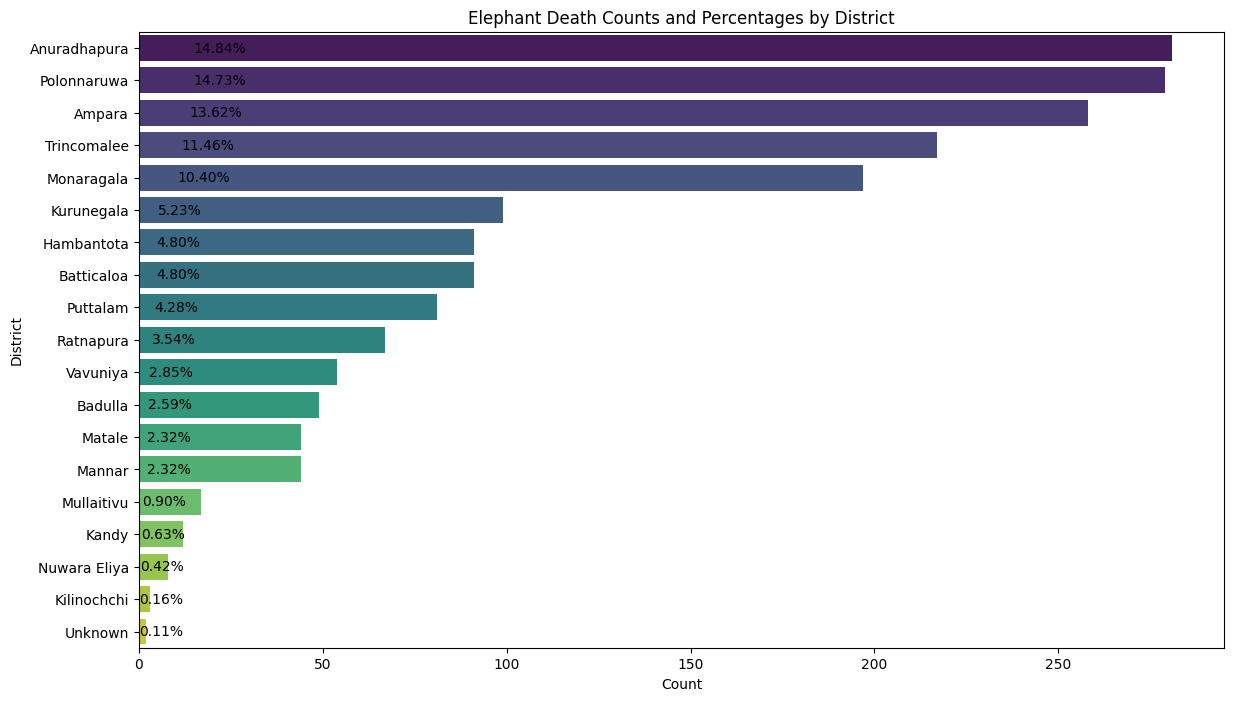

In [5]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='District', data=district_counts_df, palette='viridis')

# Annotate with percentages
for index, value in enumerate(district_counts_df['Percentage']):
    plt.text(value, index, f'{value:.2f}%', va='center')

plt.title('Elephant Death Counts and Percentages by District')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

In [6]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Extract the year from the 'Date of Death' column
df['Year'] = df['Date of Death'].dt.year

# Group by 'District' and 'Year' and count the number of deaths
death_counts = df.groupby(['District', 'Year']).size().reset_index(name='Death Count')

# Pivot the table for better visualization
death_counts_pivot_DY = death_counts.pivot(index='District', columns='Year', values='Death Count').fillna(0)
death_counts_pivot_DY

Year,2010,2011,2012,2013,2014,2015,2016,2017
District,,,,,,,,
Ampara,34.0,23.0,33.0,22.0,39.0,36.0,37.0,34.0
Anuradhapura,36.0,43.0,29.0,39.0,27.0,30.0,44.0,33.0
Badulla,7.0,6.0,5.0,2.0,5.0,6.0,6.0,12.0
Batticaloa,7.0,11.0,14.0,4.0,13.0,13.0,17.0,12.0
Hambantota,17.0,15.0,12.0,12.0,15.0,5.0,5.0,10.0
Kandy,1.0,1.0,2.0,4.0,1.0,1.0,2.0,0.0
Kilinochchi,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
Kurunegala,10.0,15.0,17.0,12.0,10.0,10.0,13.0,12.0
Mannar,7.0,4.0,6.0,2.0,10.0,2.0,8.0,5.0


In [7]:
district_counts_df['Avg_deaths_perYear'] = (district_counts_df['Count'] /df['Date of Death'].dt.year.nunique())
district_counts_df

,District,Count,Percentage,Avg_deaths_perYear
0,Anuradhapura,281,14.836325,35.125
1,Polonnaruwa,279,14.730729,34.875
2,Ampara,258,13.621964,32.250
3,Trincomalee,217,11.457233,27.125
4,Monaragala,197,10.401267,24.625
5,Kurunegala,99,5.227033,12.375
6,Hambantota,91,4.804646,11.375
7,Batticaloa,91,4.804646,11.375
8,Puttalam,81,4.276663,10.125
9,Ratnapura,67,3.537487,8.375


In [8]:
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(death_counts_pivot_DY)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")


Chi-square test results:
Chi2 Value: 192.1359507379542
P-value: 0.00013508179089858607


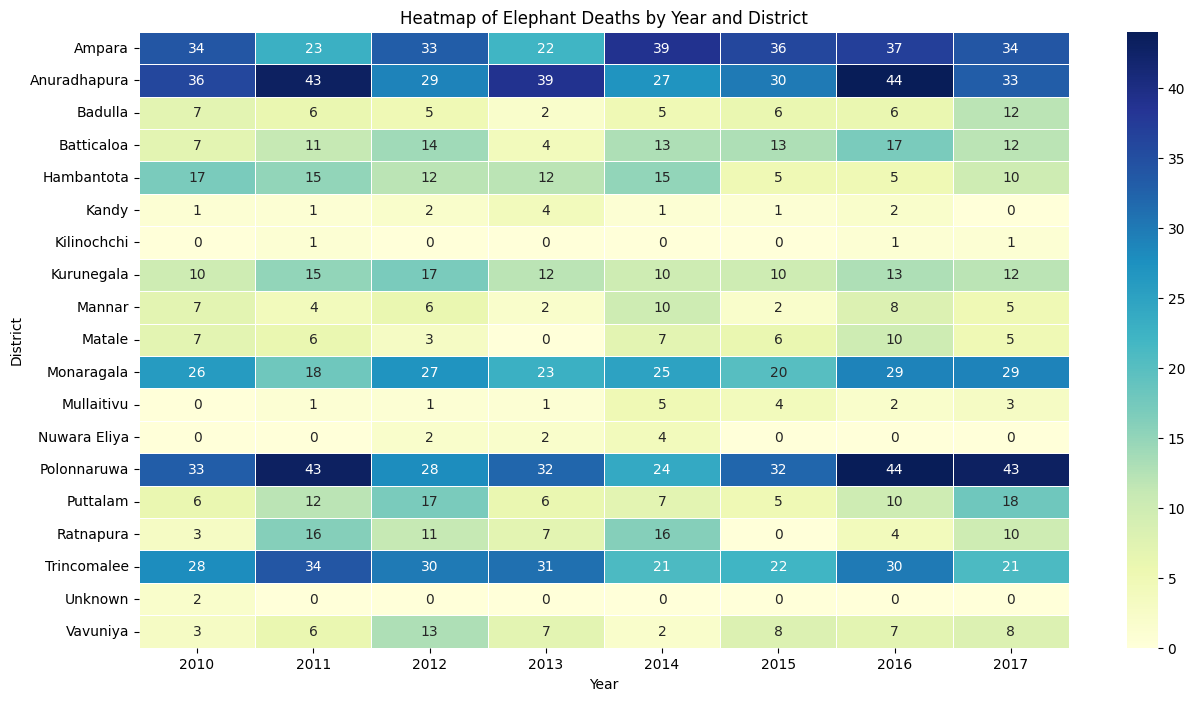

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(death_counts_pivot_DY, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Elephant Deaths by Year and District')
plt.show()

## district vs Cause of death

In [10]:


contingency_table = pd.crosstab(index=df['District'], columns=df['Main_Cause'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")


Chi-square test results:
Chi2 Value: 384.2281994642287
P-value: 3.65582510661619e-44


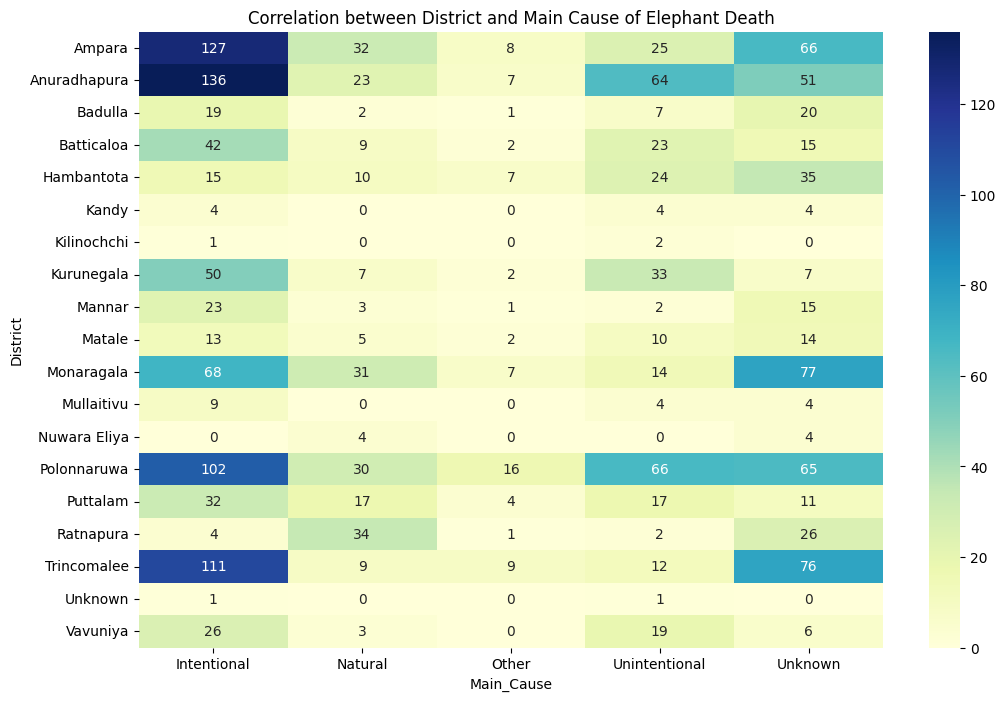

In [11]:
import seaborn as sns
contingency_table = pd.crosstab(df['District'], df['Main_Cause'])

# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between District and Main Cause of Elephant Death')
plt.show()

In [12]:
contingency_table

Main_Cause,Intentional,Natural,Other,Unintentional,Unknown
District,,,,,
Ampara,127,32,8,25,66
Anuradhapura,136,23,7,64,51
Badulla,19,2,1,7,20
Batticaloa,42,9,2,23,15
Hambantota,15,10,7,24,35
Kandy,4,0,0,4,4
Kilinochchi,1,0,0,2,0
Kurunegala,50,7,2,33,7
Mannar,23,3,1,2,15


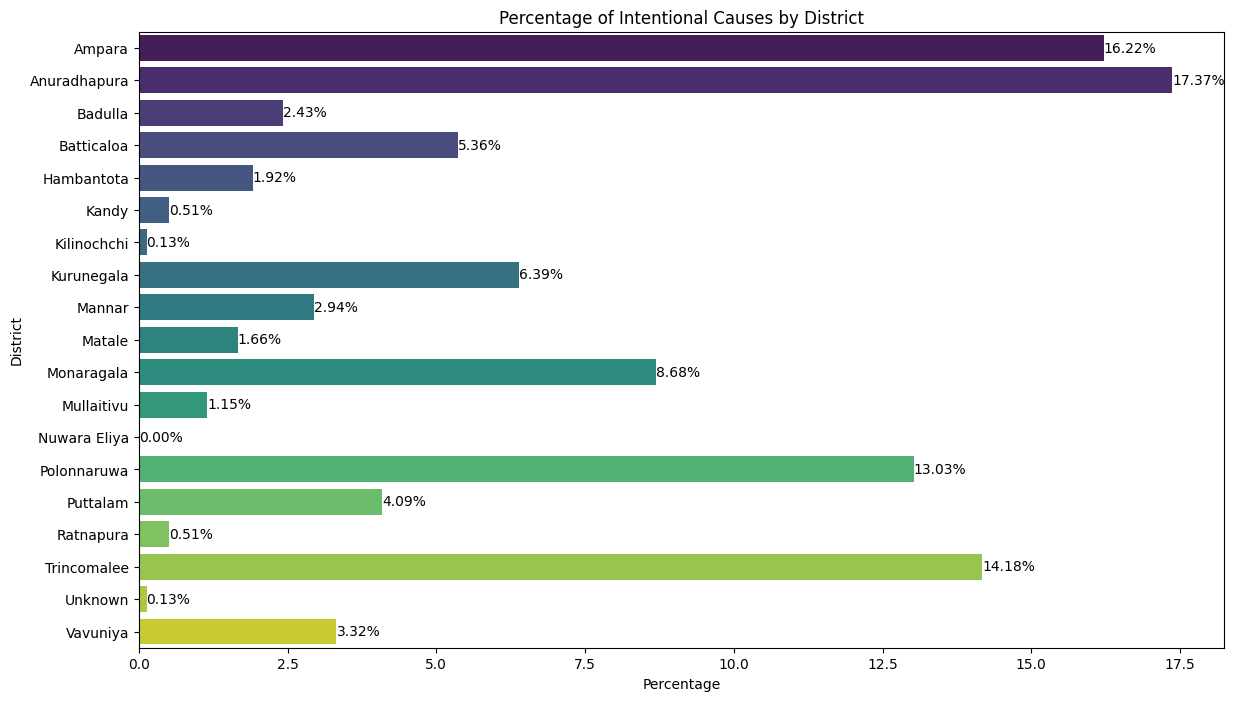

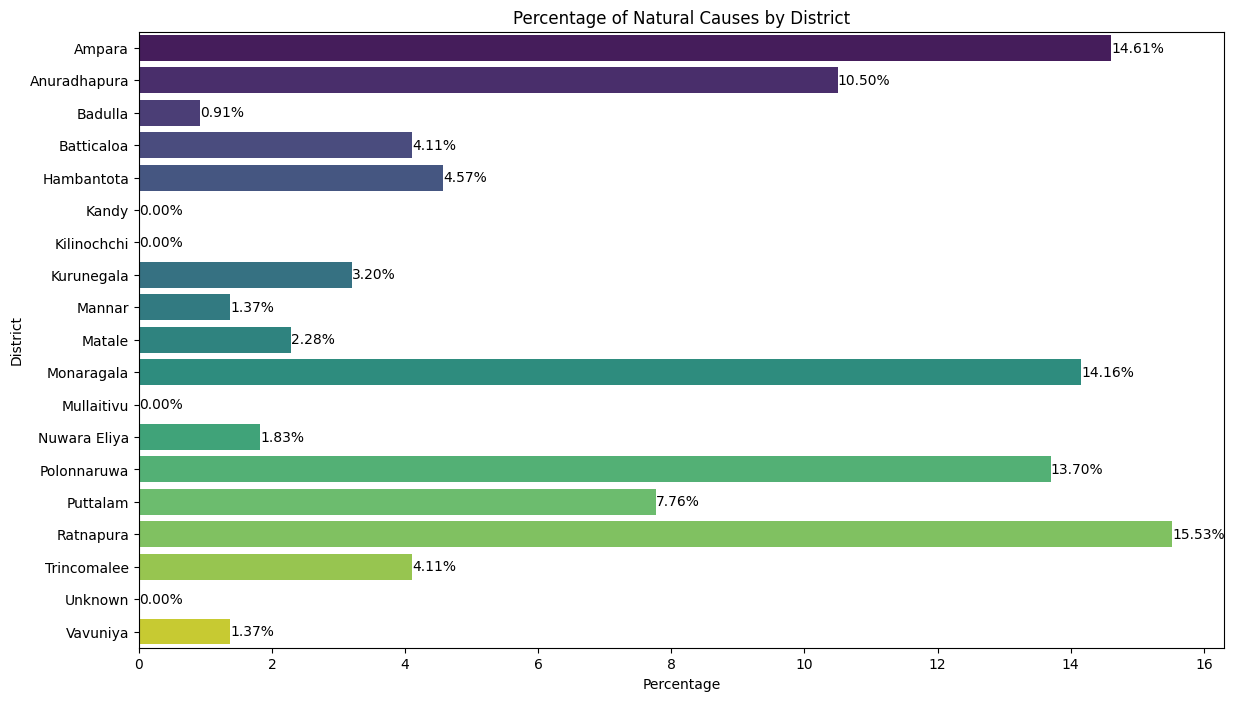

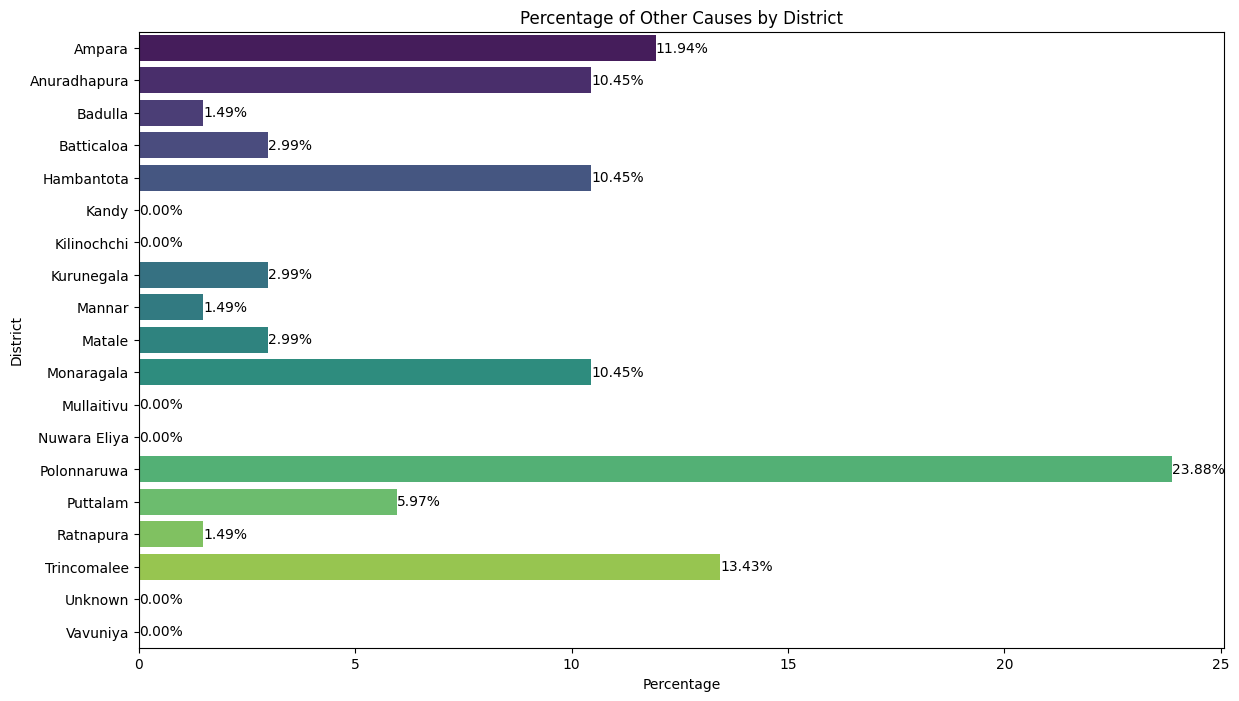

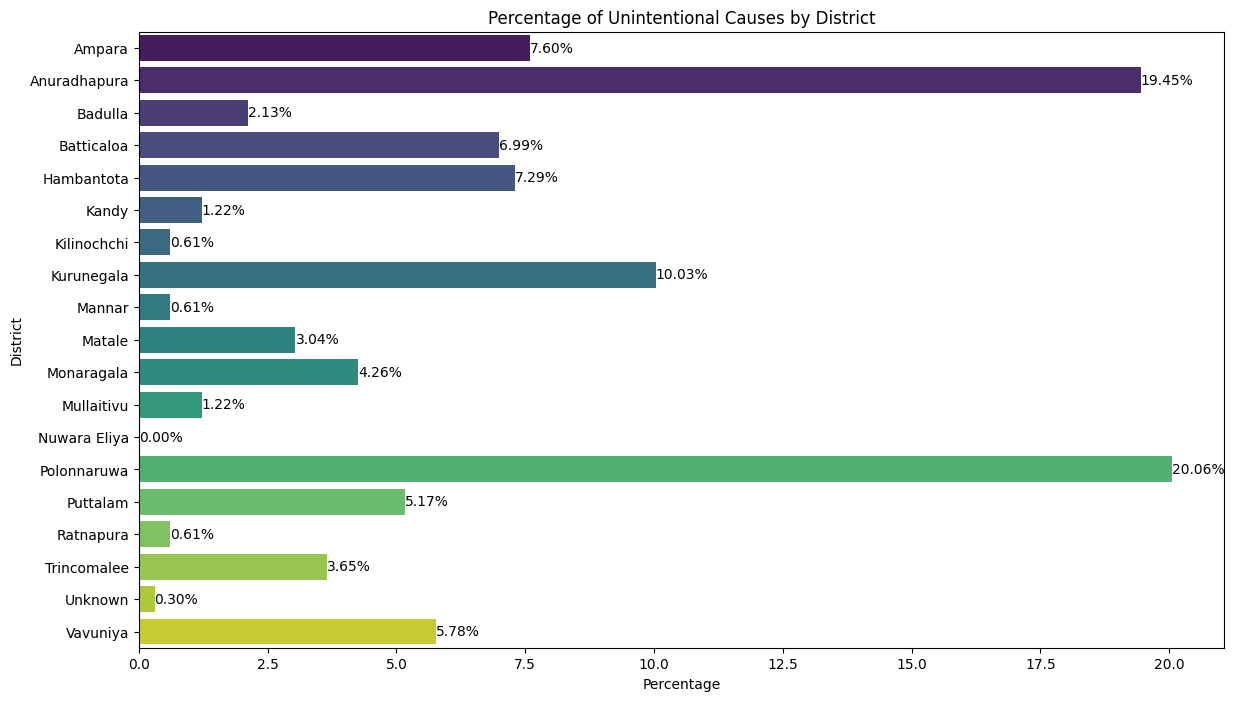

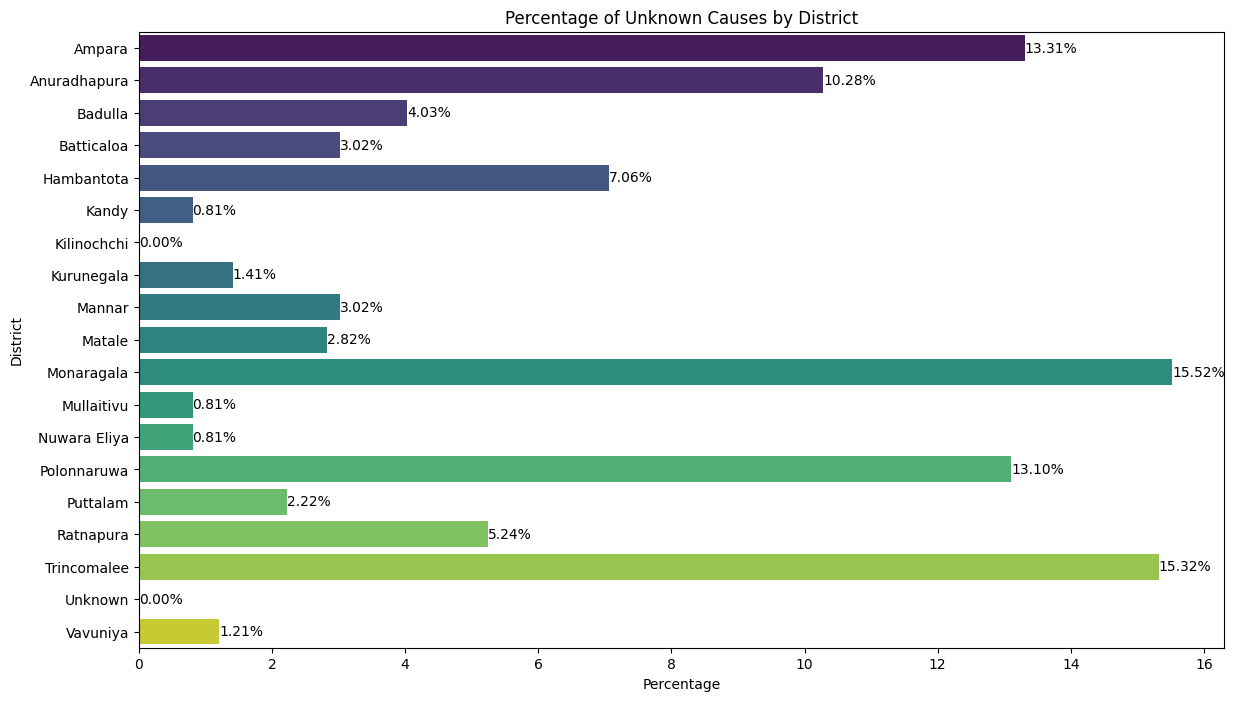

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named contingency_table
main_causes = ['Intentional', 'Natural', 'Other', 'Unintentional', 'Unknown']



for cause in main_causes:
    plt.figure(figsize=(14, 8))

    contingency_table[f'{cause}_Percentage'] = (contingency_table[cause] / contingency_table[cause].sum()) * 100
    reset_cause = contingency_table.reset_index()
    
    sns.barplot(x=f'{cause}_Percentage', y='District', data=reset_cause, palette='viridis')
    
    for index, value in enumerate(reset_cause[f'{cause}_Percentage']):
        plt.text(value, index, f'{value:.2f}%', va='center')

    plt.title(f'Percentage of {cause} Causes by District')
    plt.xlabel('Percentage')
    plt.ylabel('District')
    plt.show()


## District vs Gender

In [14]:
contingency_table = pd.crosstab(index=df['District'], columns=df['Sex'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

Chi-square test results:
Chi2 Value: 85.0819376298146
P-value: 7.497550976671958e-06


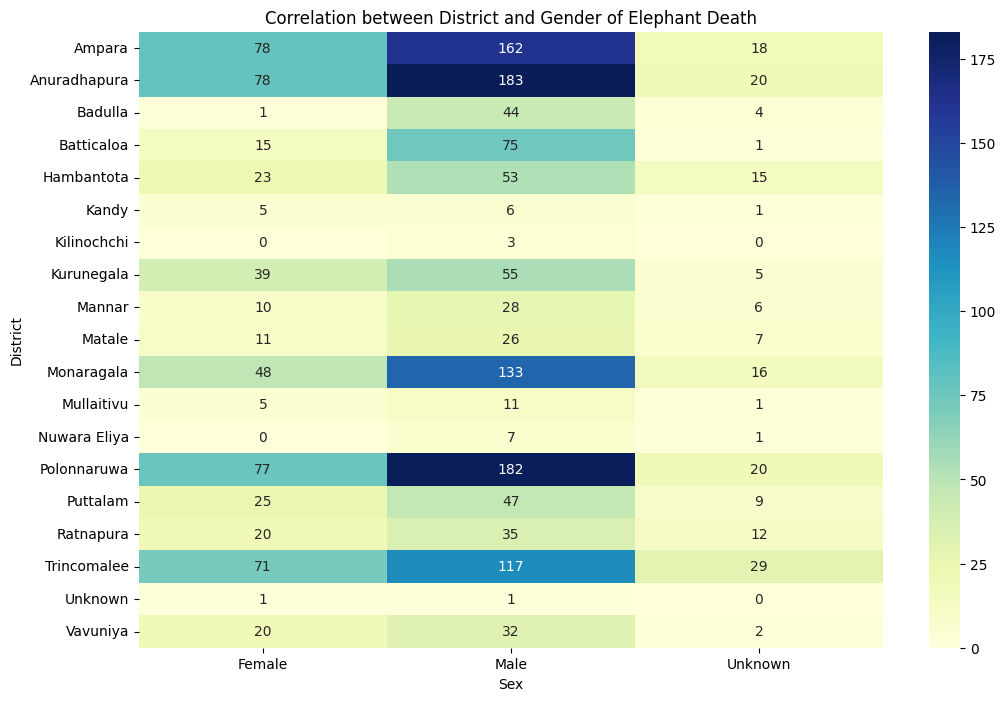

In [15]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between District and Gender of Elephant Death')
plt.show()

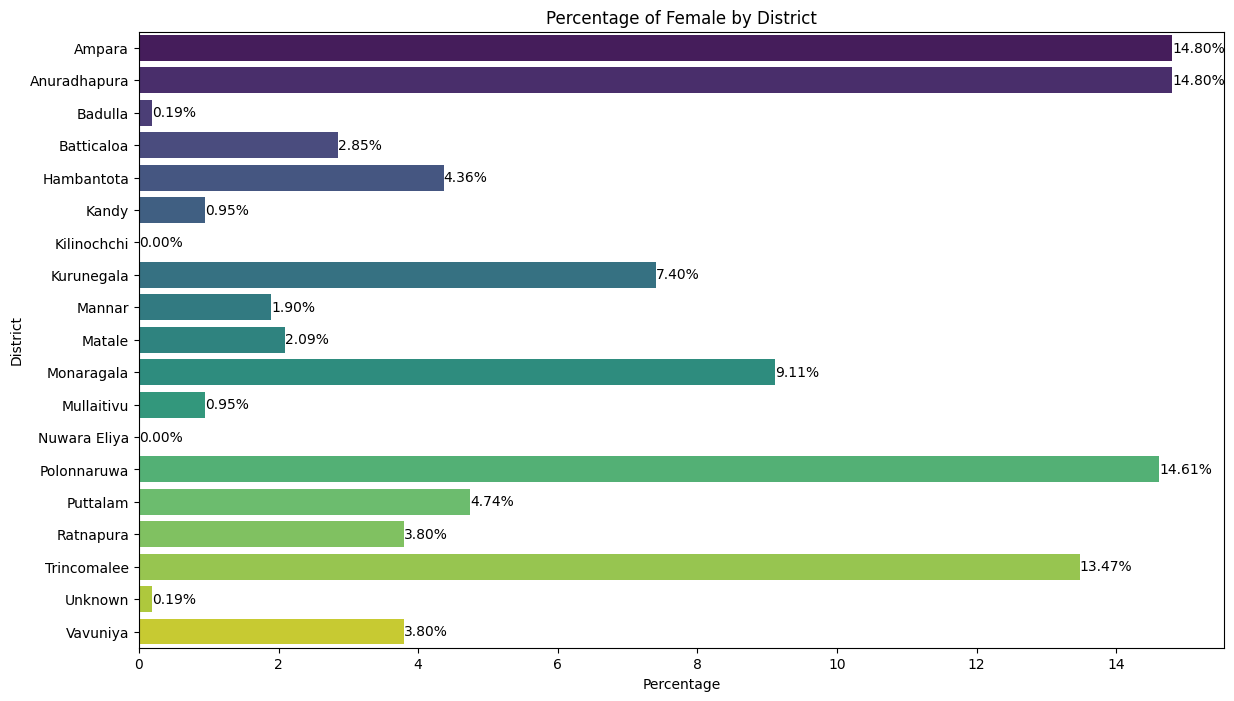

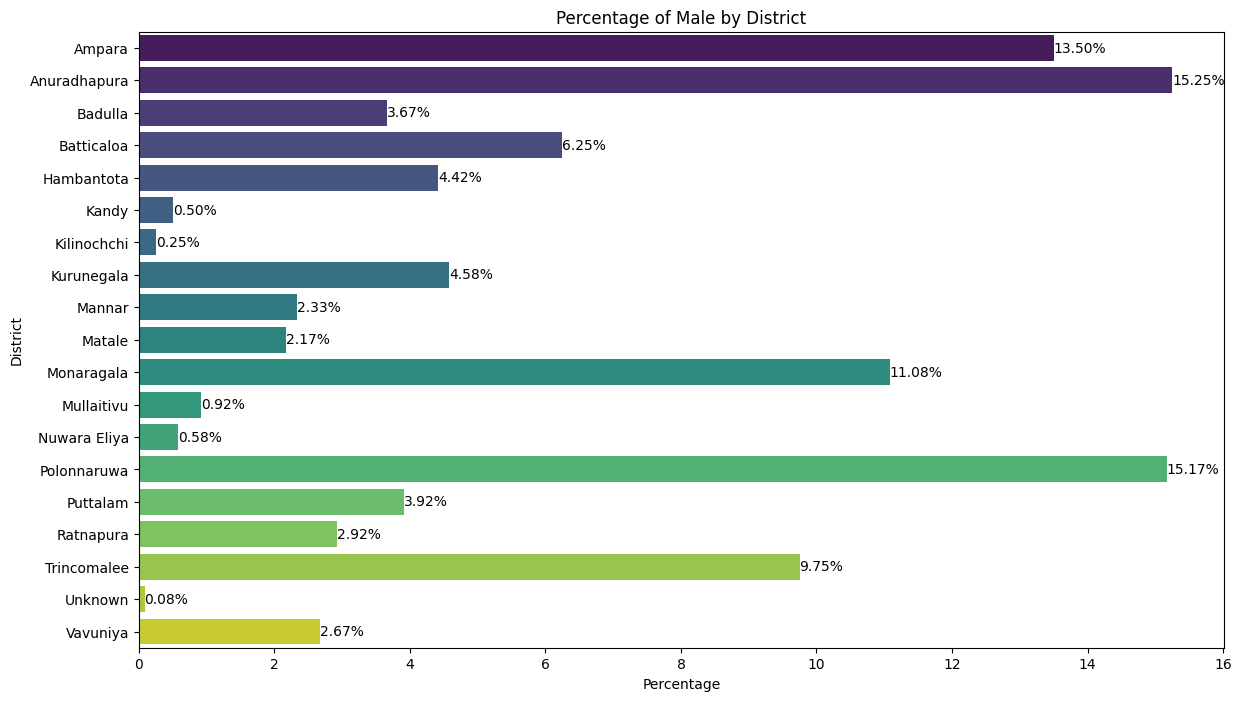

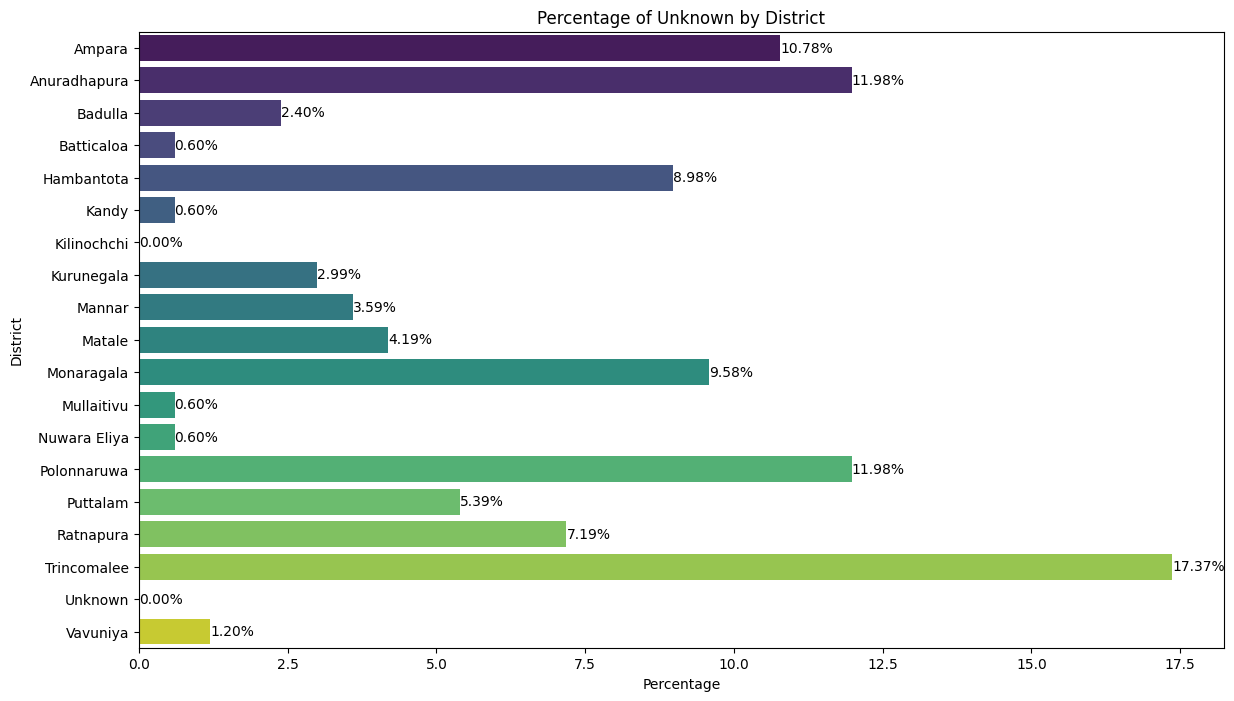

In [16]:
main_causes = ['Female', 'Male','Unknown']



for cause in main_causes:
    plt.figure(figsize=(14, 8))

    contingency_table[f'{cause}_Percentage'] = (contingency_table[cause] / contingency_table[cause].sum()) * 100
    reset_cause = contingency_table.reset_index()
    
    sns.barplot(x=f'{cause}_Percentage', y='District', data=reset_cause, palette='viridis')
    
    for index, value in enumerate(reset_cause[f'{cause}_Percentage']):
        plt.text(value, index, f'{value:.2f}%', va='center')

    plt.title(f'Percentage of {cause} by District')
    plt.xlabel('Percentage')
    plt.ylabel('District')
    plt.show()

## District vs Age category

In [17]:
contingency_table = pd.crosstab(index=df['District'], columns=df['Age Category'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

Chi-square test results:
Chi2 Value: 264.57016085410936
P-value: 8.315174847111374e-24


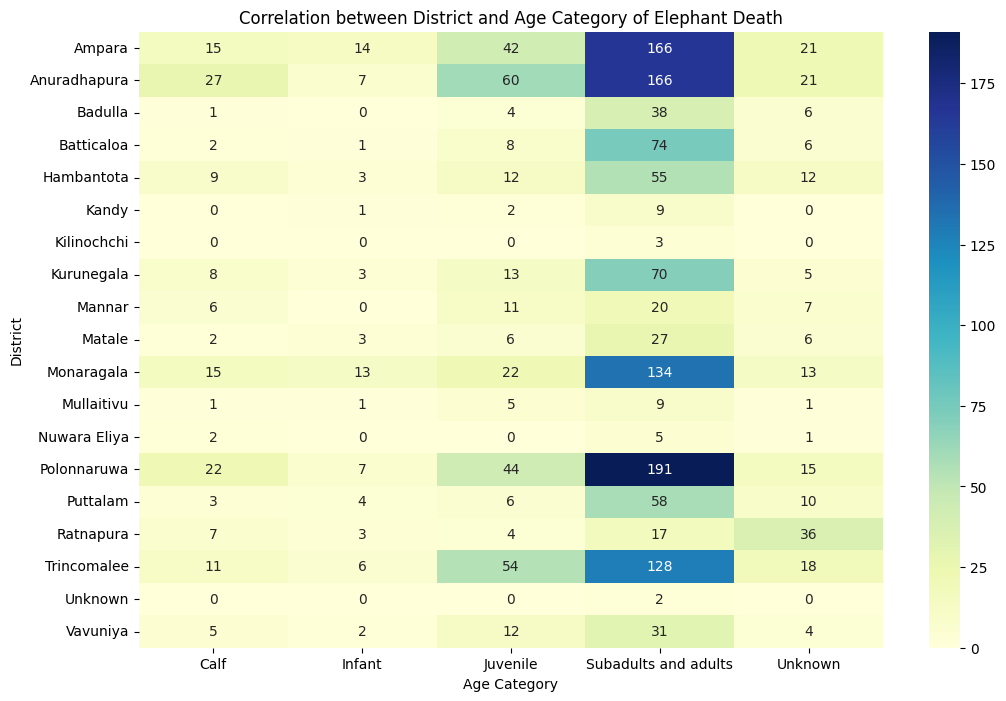

In [18]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between District and Age Category of Elephant Death')
plt.show()

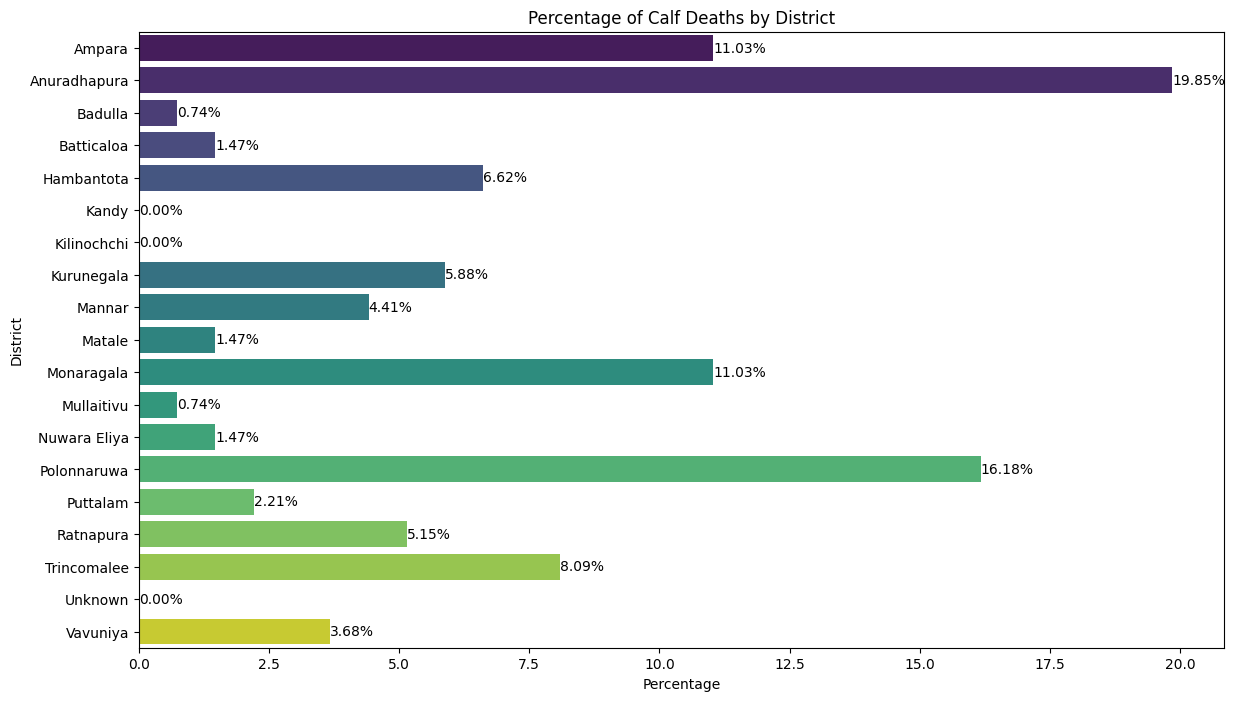

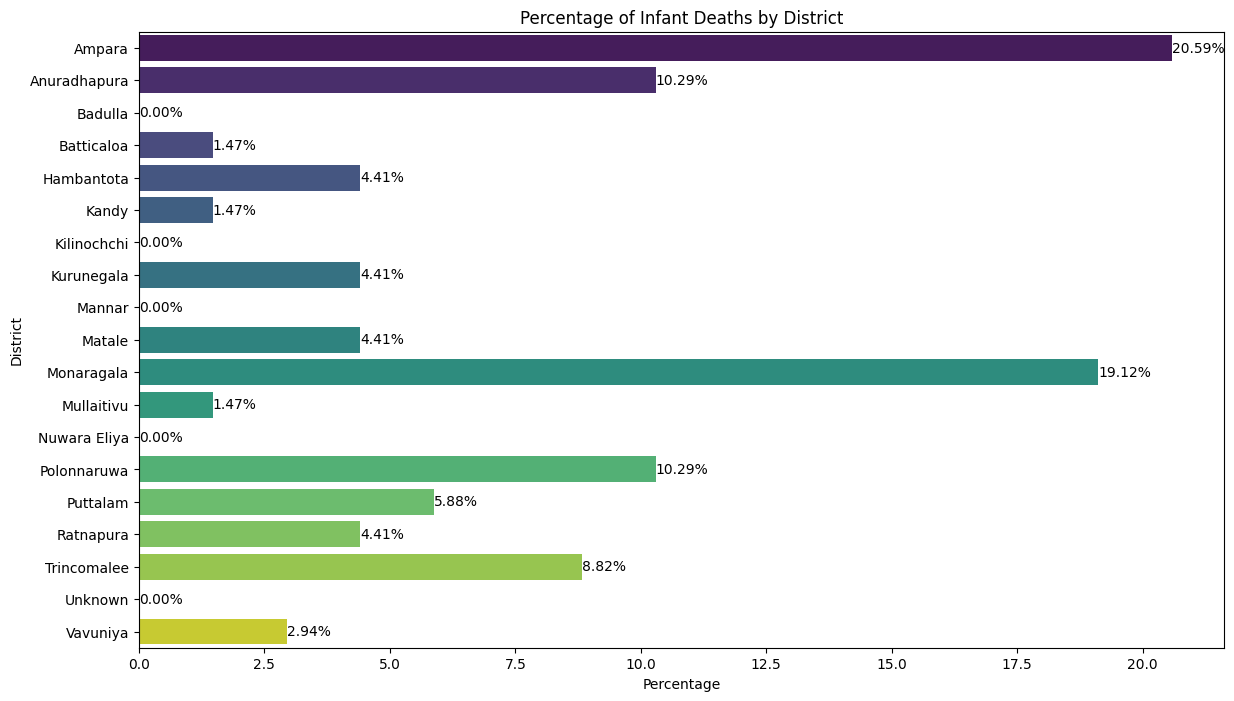

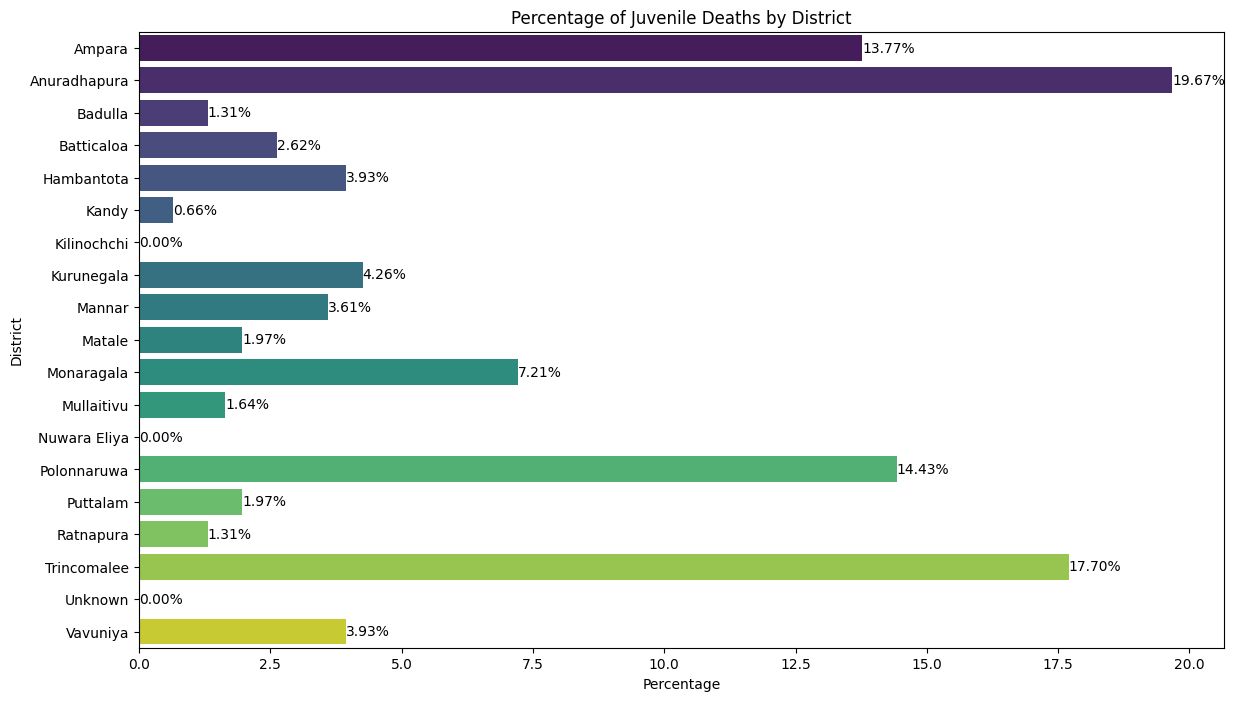

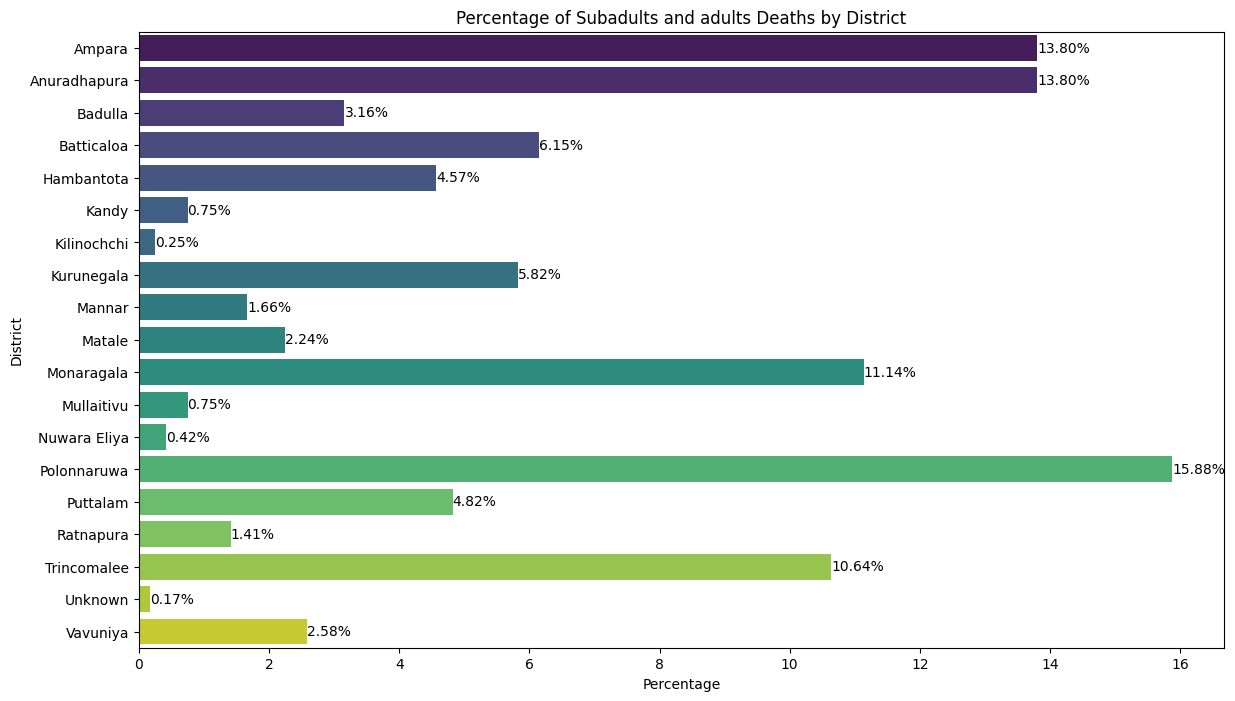

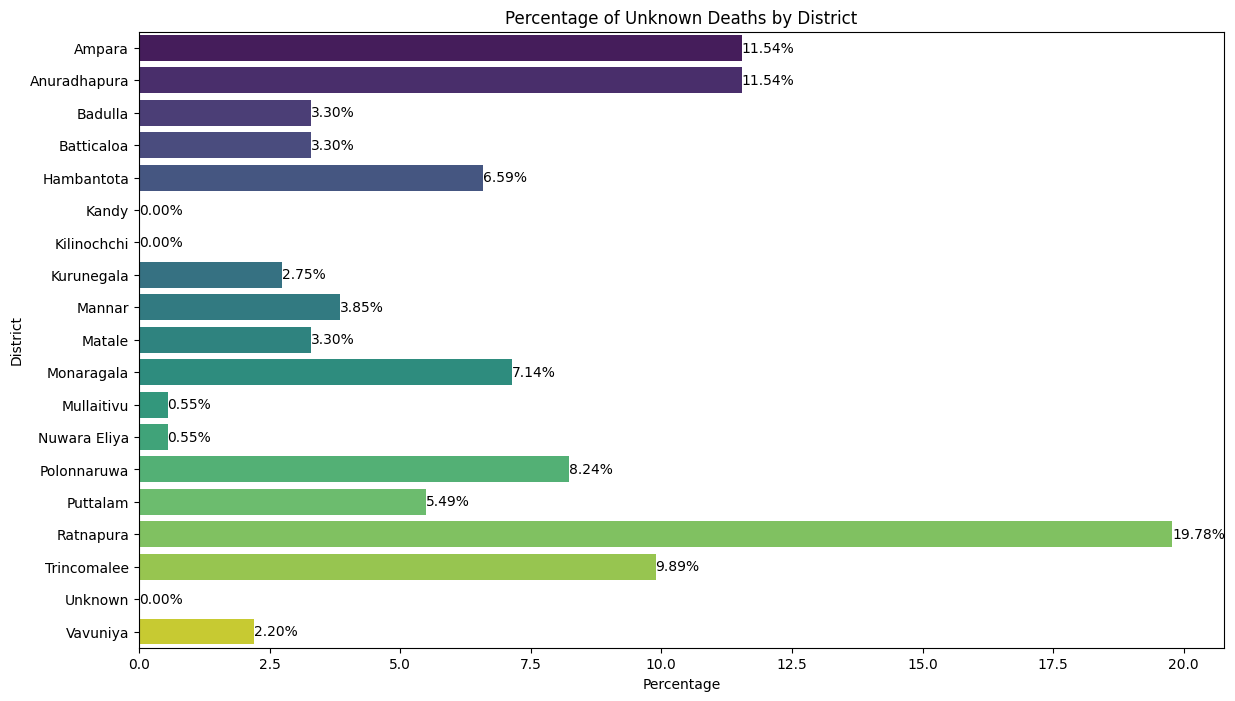

In [19]:
main_causes = ['Calf', 'Infant','Juvenile','Subadults and adults','Unknown']



for cause in main_causes:
    plt.figure(figsize=(14, 8))

    contingency_table[f'{cause}_Percentage'] = (contingency_table[cause] / contingency_table[cause].sum()) * 100
    reset_cause = contingency_table.reset_index()
    
    sns.barplot(x=f'{cause}_Percentage', y='District', data=reset_cause, palette='viridis')
    
    for index, value in enumerate(reset_cause[f'{cause}_Percentage']):
        plt.text(value, index, f'{value:.2f}%', va='center')

    plt.title(f'Percentage of {cause} Deaths by District')
    plt.xlabel('Percentage')
    plt.ylabel('District')
    plt.show()

## District vs Death Year

In [20]:
contingency_table = pd.crosstab(index=df['District'], columns=df['Year'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

Chi-square test results:
Chi2 Value: 192.1359507379542
P-value: 0.00013508179089858607


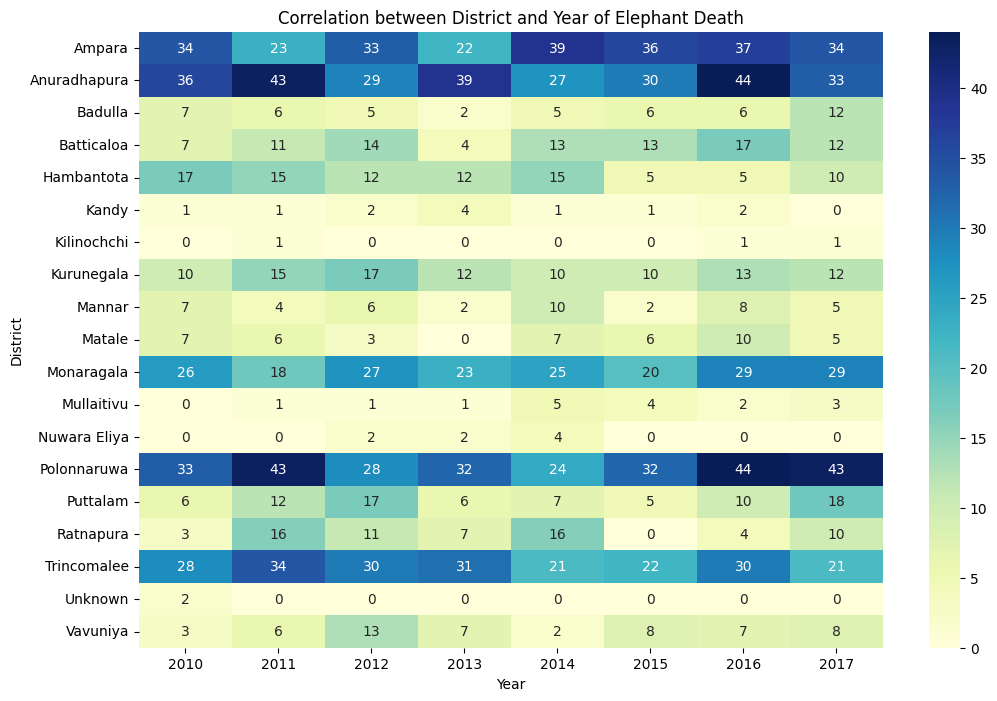

In [21]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between District and Year of Elephant Death')
plt.show()

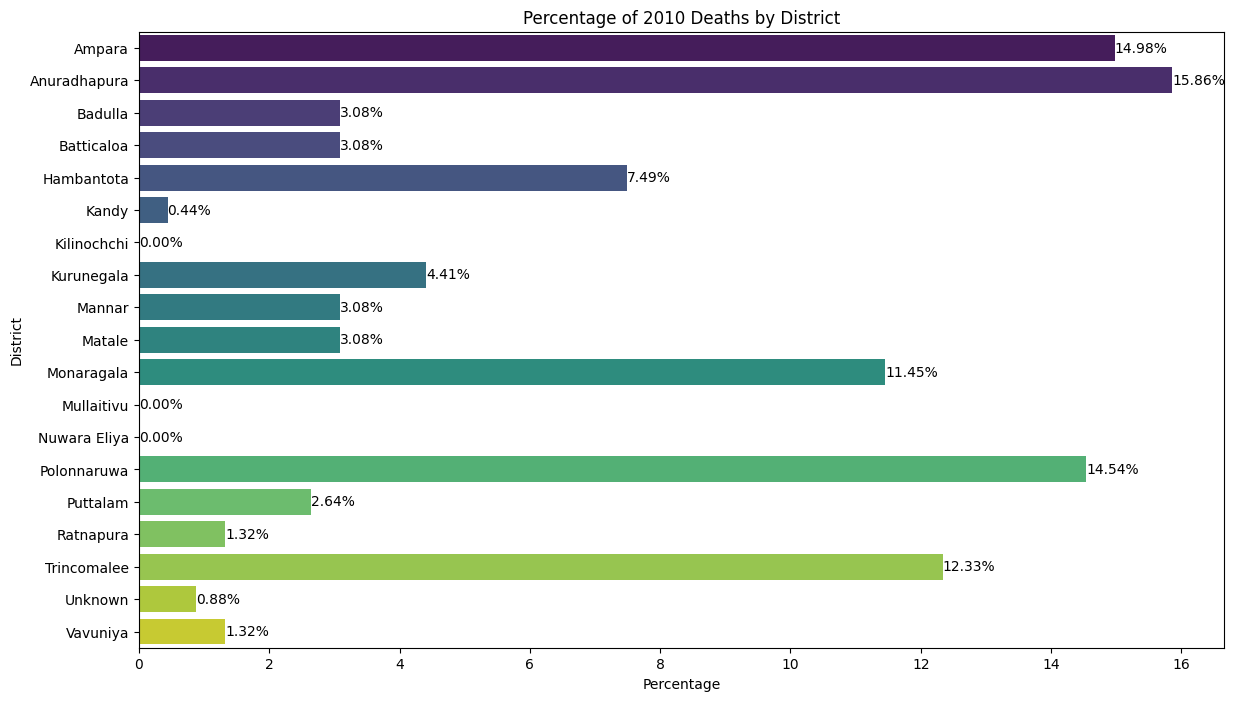

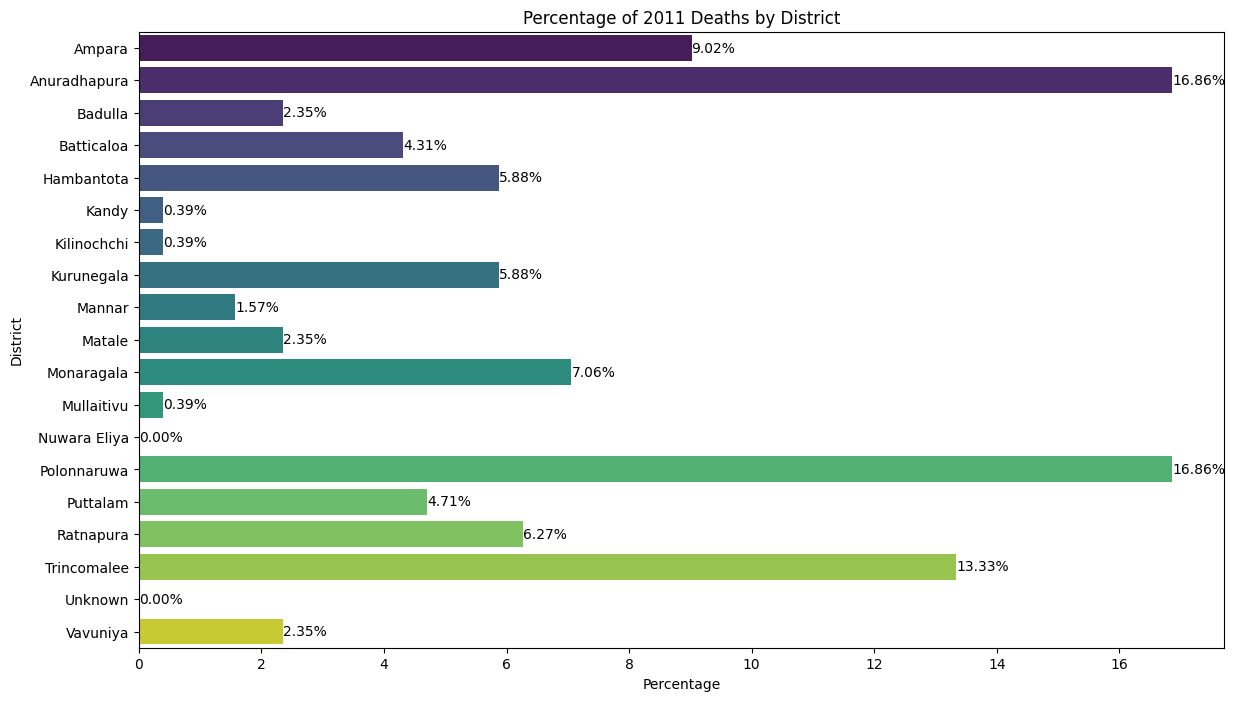

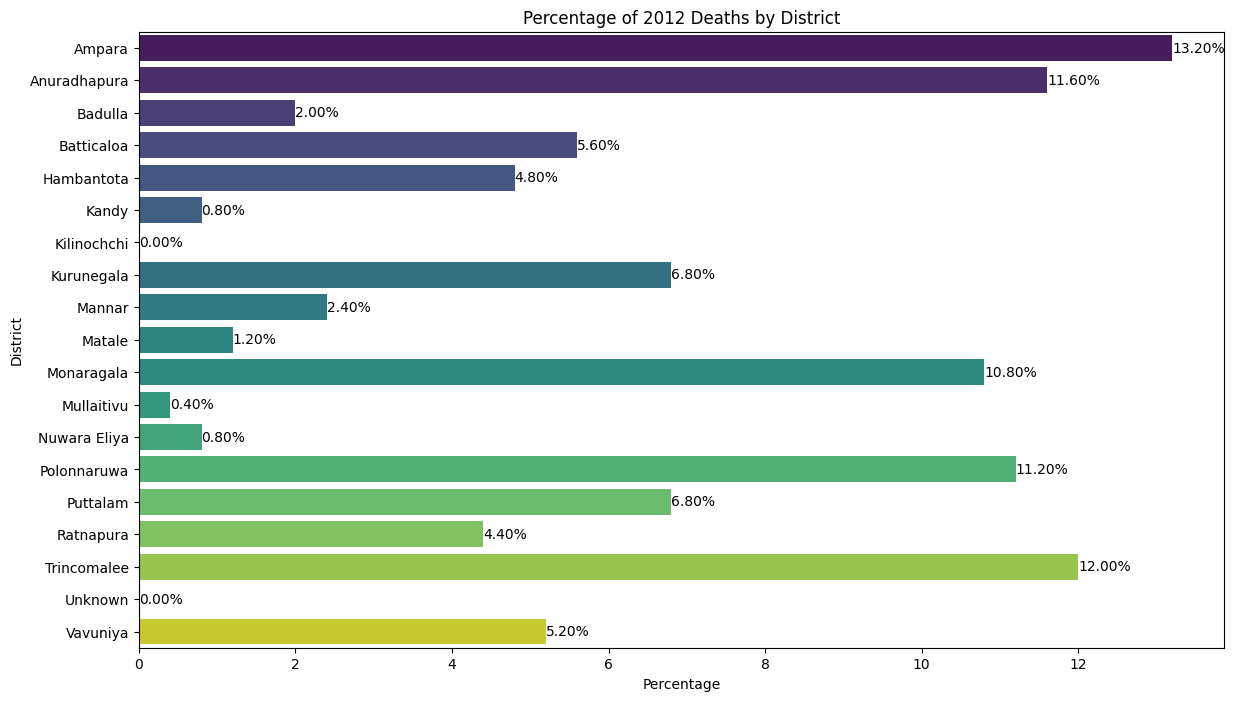

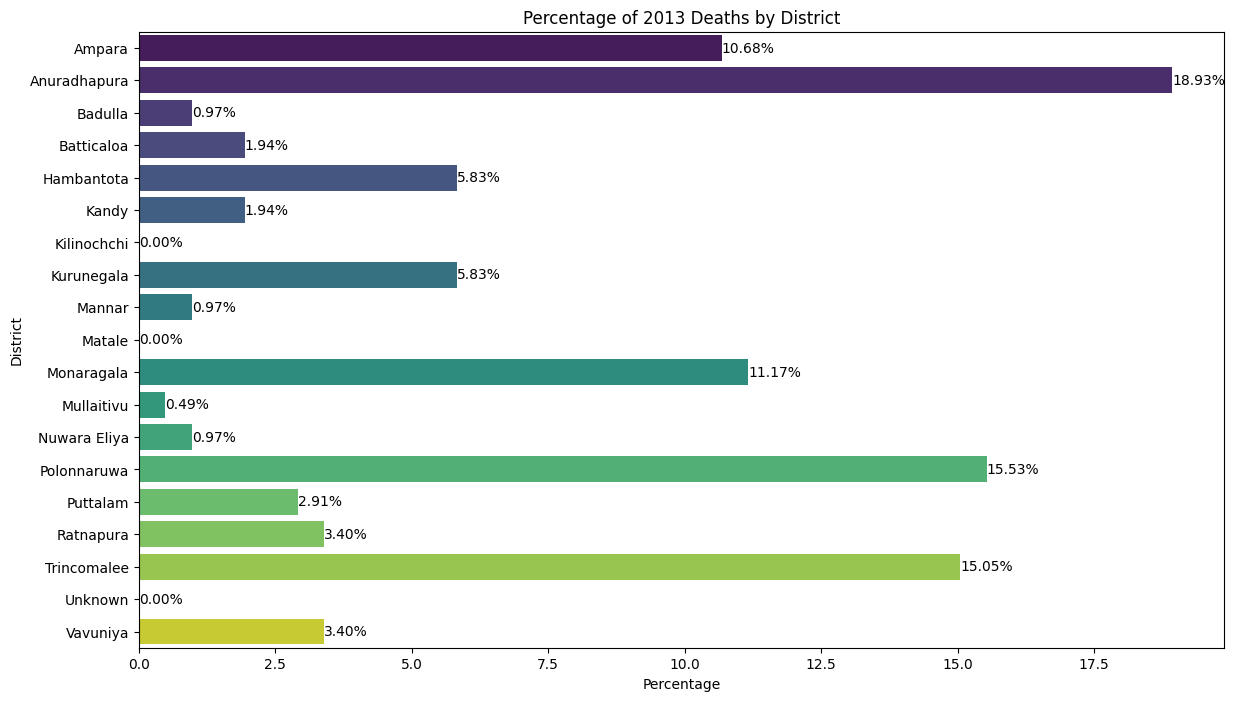

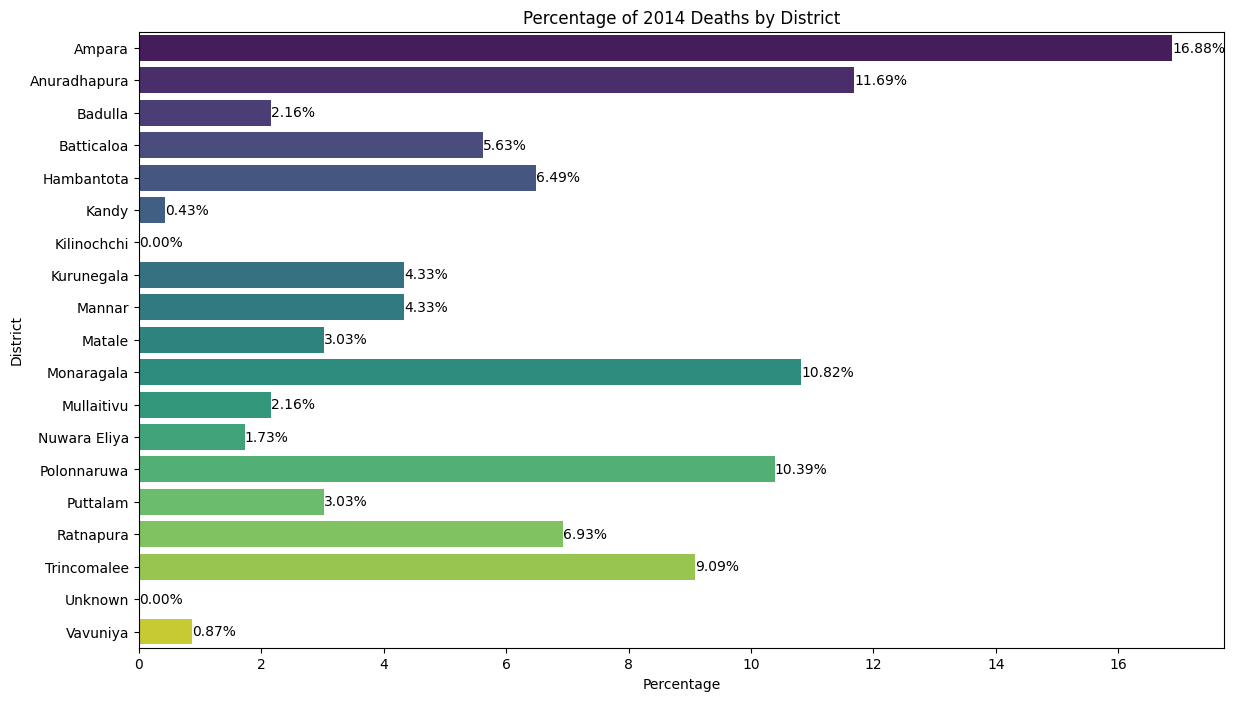

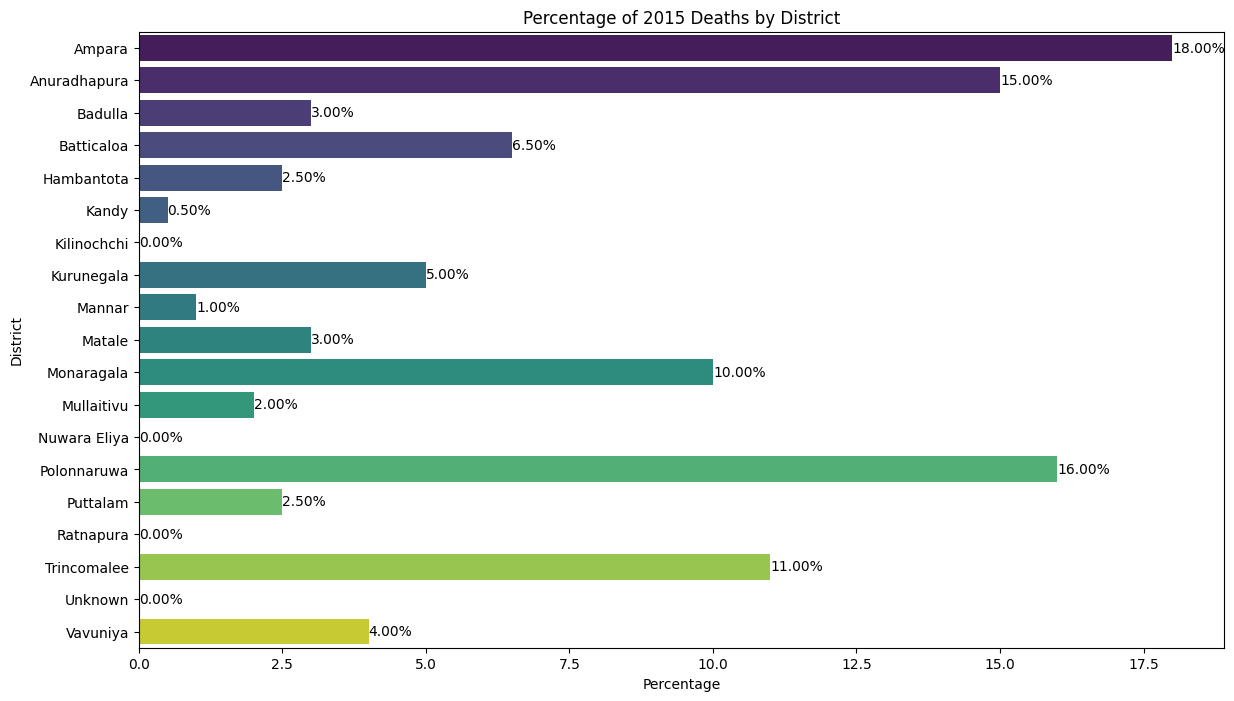

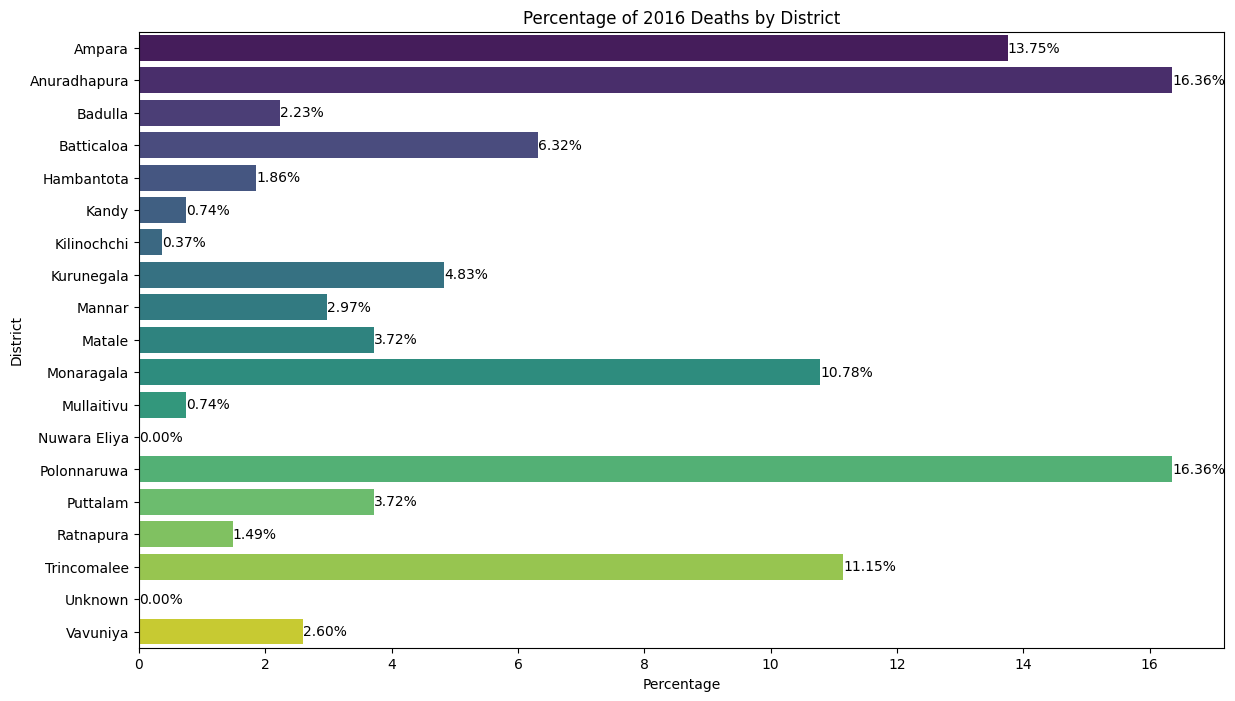

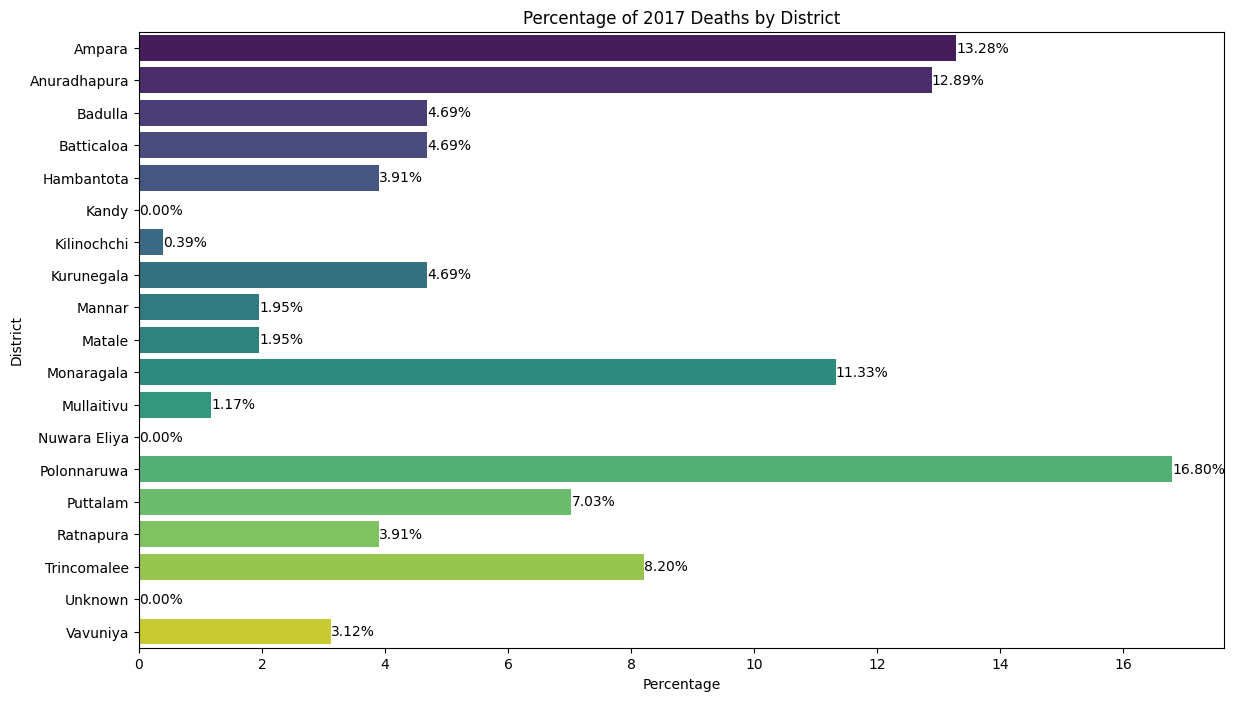

In [22]:
main_causes = [2010,2011,2012,2013,2014,2015,2016,2017]



for cause in main_causes:
    plt.figure(figsize=(14, 8))

    contingency_table[f'{cause}_Percentage'] = (contingency_table[cause] / contingency_table[cause].sum()) * 100
    reset_cause = contingency_table.reset_index()
    
    sns.barplot(x=f'{cause}_Percentage', y='District', data=reset_cause, palette='viridis')
    
    for index, value in enumerate(reset_cause[f'{cause}_Percentage']):
        plt.text(value, index, f'{value:.2f}%', va='center')

    plt.title(f'Percentage of {cause} Deaths by District')
    plt.xlabel('Percentage')
    plt.ylabel('District')
    plt.show()

In [23]:
df

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category,Main_Cause,Year
0,1,Southern,Monaragala,Katharagama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults,Unknown,2010
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults,Unknown,2010
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults,Unintentional,2010
3,4,Eastern,Ampara,Thirukkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults,Intentional,2010
4,5,North Western,Kurunegala,Ipalogama,2010-01-15,Accident,Male,5,Juvenile,Unintentional,2010
...,...,...,...,...,...,...,...,...,...,...,...
1889,1890,Elephant Transit Home,Ratnapura,Ratnapura,2017-12-28,Natural,Female,Unknown,Unknown,Natural,2017
1890,1891,Southern,Ratnapura,Weligepola,2017-12-28,Body destroyed,Male,25,Subadults and adults,Unknown,2017
1891,1892,Anuradhapura,Anuradhapura,Kebithigollewa,2017-12-28,Body destroyed,Female,20,Subadults and adults,Unknown,2017
1892,1893,Trincomalee,Trincomalee,Kantalai,2017-12-29,Electrocuted,Unknown,25-30,Subadults and adults,Unintentional,2017


## Cause of deaths vs age category

In [24]:
contingency_table = pd.crosstab(index=df['Cause of Death'], columns=df['Age Category'])
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

Chi-square test results:
Chi2 Value: 601.7984922681819
P-value: 1.3498544008303112e-69


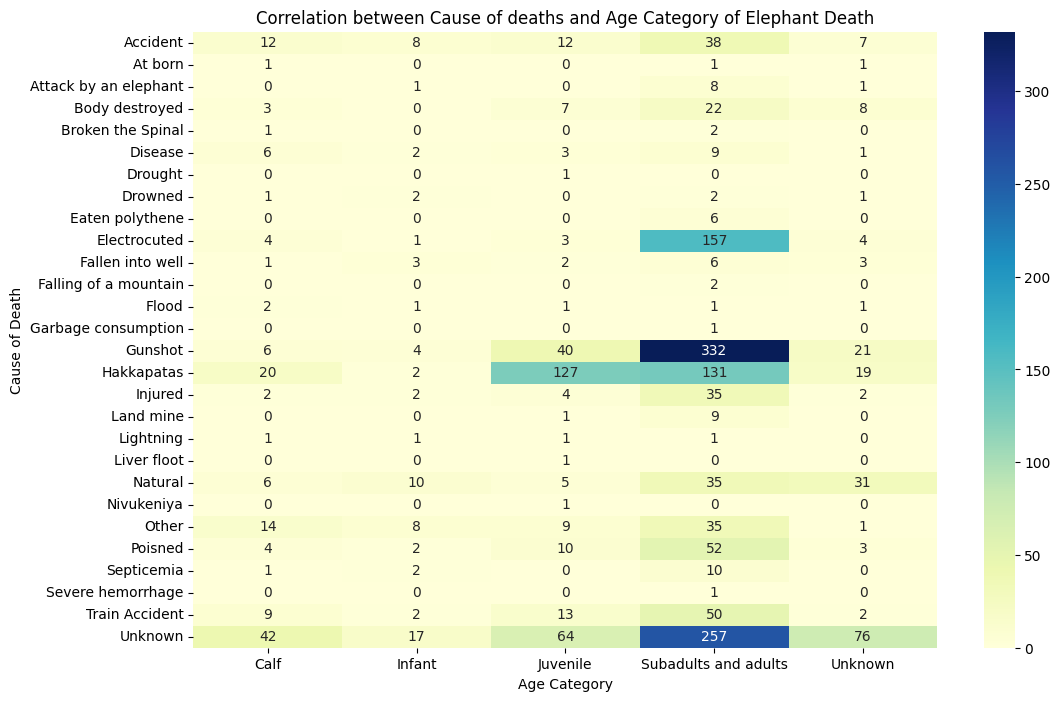

In [25]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between Cause of deaths and Age Category of Elephant Death')
plt.show()

## sex vs age category

In [26]:
contingency_table = pd.crosstab(index=df['Sex'], columns=df['Age Category'])
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print(f"Chi2 Value: {chi2}")
print(f"P-value: {p}")

Chi-square test results:
Chi2 Value: 236.62187568502154
P-value: 1.1754227769099392e-46


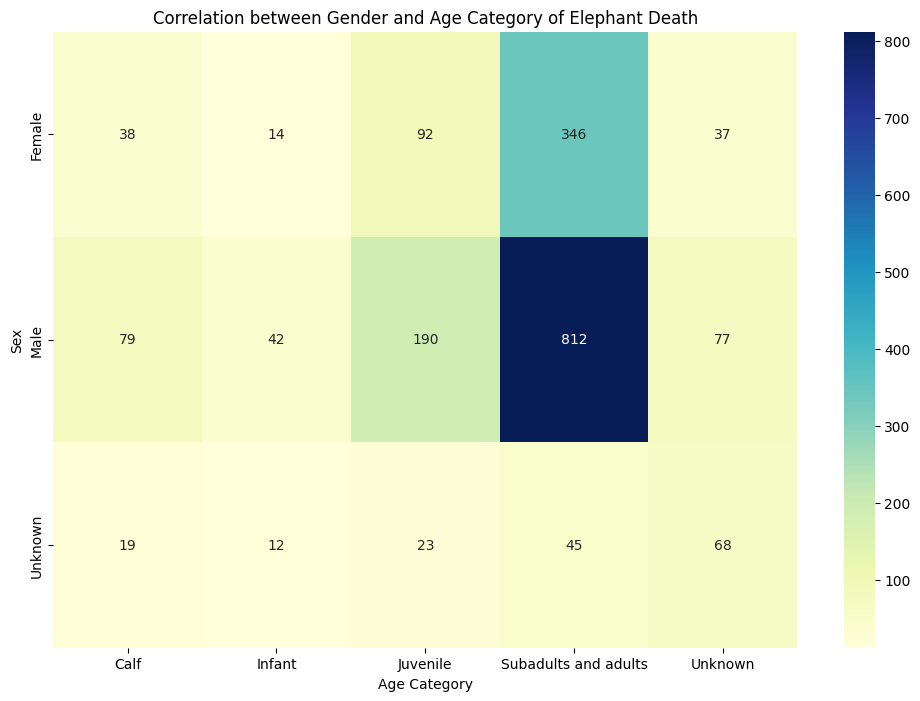

In [38]:
# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Correlation between Gender and Age Category of Elephant Death')
plt.show()

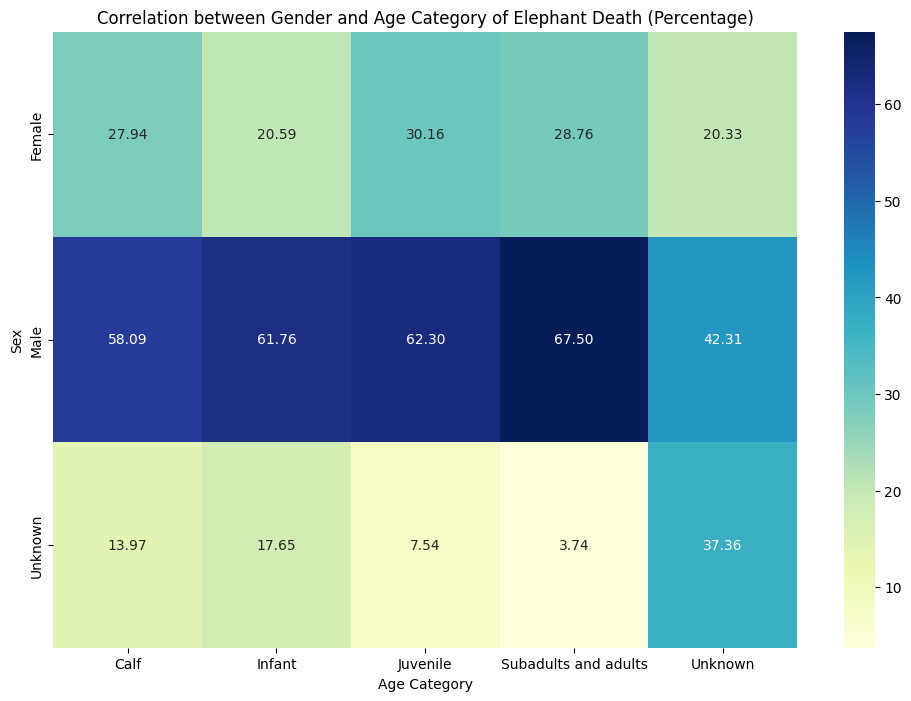

In [37]:
import numpy as np

# Assuming contingency_table is your original table
total_counts = np.sum(contingency_table)
percentage_table = (contingency_table / total_counts) * 100

# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True)
plt.title('Correlation between Gender and Age Category of Elephant Death (Percentage)')
plt.show()